# Everything Counts Assignment 1

This is my assignment.


## The data

The experiment aimed to test the impact of nature-focused activities on people's connectedness to nature and wellbeing.
The data were collected in an experiment. 

1295 people were recruited through social media and print media. The participants had to complete a pre-participation survey. Participants were assigned to one of six groups. Each group were asked to take part in a nature-focused activity five times in a period of eight days. The activities included: 
1) Complete a timed pollinator count.
2) Complete a 10 minute Butterfly survey.
3) Notice three good things in nature for 10 minutes.
4) Same as group 1 and also notice three good things in nature.
5) Same as group 2 and also notice three good things in nature. 
6) A control group who were asked to wait until they were contacted again.

After the eight days, all participants were 

500 participants completed the full requirements of the study. 

The dataset includes:
1) The pre-participation data of 1295 people.
2) The post-participation survey data for the 500 people that completed the survey and either took part in their assigned activies at least once or were in the wait-list control group. 

In [58]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

df = pd.read_csv("./data/natureupclose_data.csv", encoding='ISO-8859-1')
# df.shape
# df.describe()

print(f'The data contains {df.shape[0]} observations and {df.shape[1]} variables.')

The data contains 1295 observations and 65 variables.


The variables in the dataset

| Variable                                      | Type                     |
|-----------------------------------------------|--------------------------|
| PersonID                                      | Categorical Nominal      |
| LineSurvey1                                   | Categorical Nominal      |
| ResponseIDSurvey1                             | Categorical Nominal      |
| DateSurvey1                                   | Categorical Ordinal      |
| LineSurvey2                                   | Categorical Nominal      |
| ResponseIDSurvey2                             | Categorical Nominal      |
| DateSurvey2                                   | Categorical Ordinal      |
| Participant                                   | Categorical Nominal      |
| INS_pre                                       | Categorical Ordinal      |
| INS_post                                      | Categorical Ordinal      |
| NR6sum_pre                                    | Numerical Discrete       |
| NR6sum_post                                   | Numerical Discrete       |
| SatisfiedWithLife_pre                         | Categorical Ordinal      |
| SatisfiedWithLife_post                        | Categorical Ordinal      |
| WorthwhileLife_pre                            | Categorical Ordinal      |
| WorthwhileLife_post                           | Categorical Ordinal      |
| PROCOBScivilaction_pre                        | Numerical Discrete       |
| PROCOBSgarden_pre                             | Numerical Discrete       |
| PROCOBS_pre                                   | Numerical Discrete       |
| PROCOBScivilaction_post                       | Numerical Discrete       |
| PROCOBSgarden_post                            | Numerical Discrete       |
| PROCOBS_post                                  | Numerical Discrete       |
| Health_pre                                    | Categorical Ordinal      |
| Health_post                                   | Categorical Ordinal      |
| Happiness_pre                                 | Categorical Ordinal      |
| Happiness_post                                | Categorical Ordinal      |
| Age                                           | Numerical Discrete       |
| Age_comments                                  | Categorical Nominal      |
| Sex                                           | Categorical Nominal      |
| Ethnicgroup                                   | Categorical Nominal      |
| spendtimeoutsideatleastafewtimesperweek       | Categorical Nominal      |
| postcode                                      | Categorical Nominal      |
| condition                                     | Categorical Nominal      |
| conditiontext                                 | Categorical Nominal      |
| conditiontypetext                             | Categorical Nominal      |
| Engagementwiththetask                         | Categorical Ordinal      |
| Ifeltclosetonaturethroughmysenses             | Categorical Ordinal      |
| Ifoundtakingpartcalmingorjoyful               | Categorical Ordinal      |
| Inoticedthebeautyofnaturewhilsttakingpart     | Categorical Ordinal      |
| Ifoundtakingpartmeaningful                    | Categorical Ordinal      |
| Ifeltiwashelpingtotakecareofnature            | Categorical Ordinal      |
| Ifoundtakingpartfrustrating                   | Categorical Ordinal      |
| Timespentoutsideduringthetask                 | Categorical Ordinal      |
| Howmanytimesdidyoudotheactivities             | Numerical Discrete       |
| Openquestionanswers                           | Categorical Nominal      |
| Whatyoulikedabouttakingpart                   | Categorical Nominal      |
| liketheme_noticingnature                      | Categorical Nominal      |
| liketheme_intrinsicbenefits                   | Categorical Nominal      |
| liketheme_contributing                        | Categorical Nominal      |
| liketheme_learning                            | Categorical Nominal      |
| liketheme_socialconnections                   | Categorical Nominal      |
| liketheme_other                               | Categorical Nominal      |
| Whatyoudidntlikeabouttakingpart               | Categorical Nominal      |
| disliketheme_weather                          | Categorical Nominal      |
| disliketheme_lackoftime                       | Categorical Nominal      |
| disliketheme_complexity                       | Categorical Nominal      |
| disliketheme_technology                       | Categorical Nominal      |
| disliketheme_lackofsuccess                    | Categorical Nominal      |
| disliketheme_interferedwithnatureengagement   | Categorical Nominal      |
| disliketheme_nothing                          | Categorical Nominal      |
| disliketheme_other                            | Categorical Nominal      |
| Median_IMD_postcodedistrict                   | Numerical Discrete       |
| Mean_IMD_postcodedistrict                     | Numerical Continuous     |
| latitude                                      | Numerical Continuous     |
| longitude                                     | Numerical Continuous     |


In [ ]:
df.columns

Index(['PersonID', 'LineSurvey1', 'ResponseIDSurvey1', 'DateSurvey1',
       'LineSurvey2', 'ResponseIDSurvey2', 'DateSurvey2', 'Participant',
       'INS_pre', 'INS_post', 'NR6sum_pre', 'NR6sum_post',
       'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre',
       'WorthwhileLife_post', 'PROCOBScivilaction_pre', 'PROCOBSgarden_pre',
       'PROCOBS_pre', 'PROCOBScivilaction_post', 'PROCOBSgarden_post',
       'PROCOBS_post', 'Health_pre', 'Health_post', 'Happiness_pre',
       'Happiness_post', 'Age', 'Age_comments', 'Sex', 'Ethnicgroup',
       'spendtimeoutsideatleastafewtimesperweek', 'postcode', 'condition',
       'conditiontext', 'conditiontypetext', 'Engagementwiththetask',
       'Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating', 'Timespentoutsideduringthetask',
       'H

Breakdown of those participants that met the full inclusion study requirements vs those that did not meet the requirements.

<Axes: title={'center': 'Share of participants meet full inclusion requirements'}>

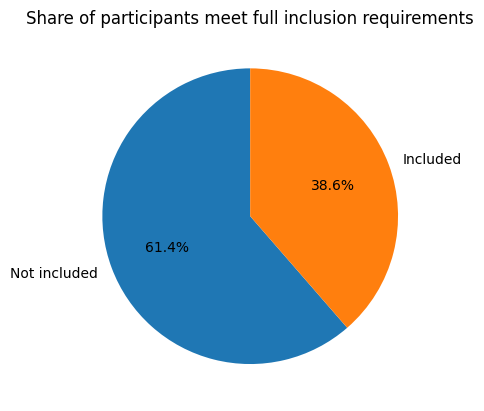

In [77]:
df['Participant'].value_counts().plot( kind='pie', startangle=90, autopct='%1.1f%%', labels=['Not included', 'Included'], ylabel="", title="Share of participants meet full inclusion requirements" )

Filter to include only those that completed all the requirements.

<Axes: xlabel='conditiontext'>

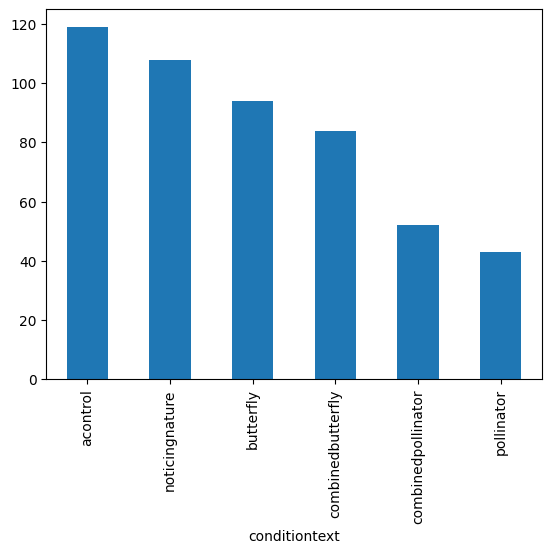

In [87]:
df_completed_reqs = df[df["Participant"] == 1]
df_completed_reqs["conditiontext"].value_counts().plot.bar()


In [9]:
df.head()

,PersonID,LineSurvey1,ResponseIDSurvey1,DateSurvey1,LineSurvey2,ResponseIDSurvey2,DateSurvey2,Participant,INS_pre,INS_post,...,disliketheme_complexity,disliketheme_technology,disliketheme_lackofsuccess,disliketheme_interferedwithnatureengagement,disliketheme_nothing,disliketheme_other,Median_IMD_postcodedistrict,Mean_IMD_postcodedistrict,latitude,longitude
0,77039.0,27,R_1Id5QzfYdxcrGWN,14/07/2020 04:21,6.0,R_6QEkF3pX5G9Xmg1,22/07/2020 05:02,1,6.0,6.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,17223.0,3,R_0kq942VbdIy9kkN,14/07/2020 01:29,7.0,R_1OH2XfO0NsrOXxH,22/07/2020 05:26,1,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23942.0,35,R_1GVwTFoFmVDxQfX,14/07/2020 05:09,8.0,R_3QMq4B5RKWCZn0D,22/07/2020 05:22,1,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86958.0,38,R_1rGinDGCzJsYjsr,14/07/2020 05:27,9.0,R_wWW9T8IS39s8pEZ,22/07/2020 05:31,1,4.0,5.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19857.0,43,R_1gTtqajS1M8c0O5,14/07/2020 05:42,10.0,R_2uECLSRSZ4nVWwe,22/07/2020 05:47,1,6.0,6.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['PersonID', 'LineSurvey1', 'ResponseIDSurvey1', 'DateSurvey1',
       'LineSurvey2', 'ResponseIDSurvey2', 'DateSurvey2', 'Participant',
       'INS_pre', 'INS_post', 'NR6sum_pre', 'NR6sum_post',
       'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre',
       'WorthwhileLife_post', 'PROCOBScivilaction_pre', 'PROCOBSgarden_pre',
       'PROCOBS_pre', 'PROCOBScivilaction_post', 'PROCOBSgarden_post',
       'PROCOBS_post', 'Health_pre', 'Health_post', 'Happiness_pre',
       'Happiness_post', 'Age', 'Age_comments', 'Sex', 'Ethnicgroup',
       'spendtimeoutsideatleastafewtimesperweek', 'postcode', 'condition',
       'conditiontext', 'conditiontypetext', 'Engagementwiththetask',
       'Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating', 'Timespentoutsideduringthetask',
       'H

<Axes: ylabel='Frequency'>

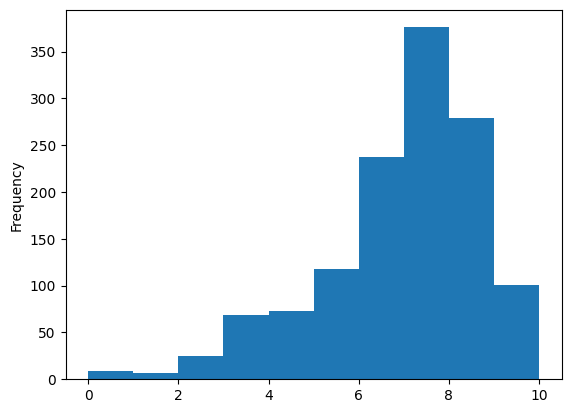

In [46]:
df['SatisfiedWithLife_pre'].plot(kind='hist')

<Axes: ylabel='Frequency'>

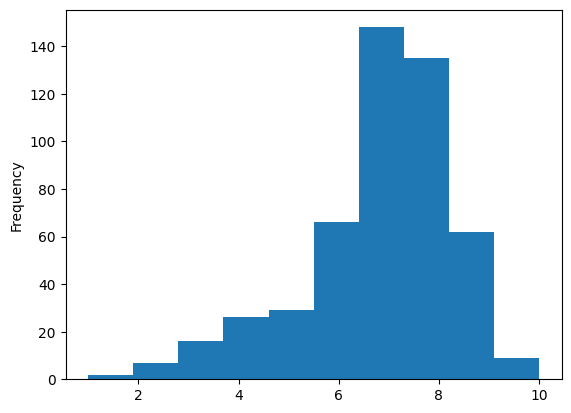

In [47]:
df['SatisfiedWithLife_post'].plot(kind='hist')

<Axes: ylabel='Frequency'>

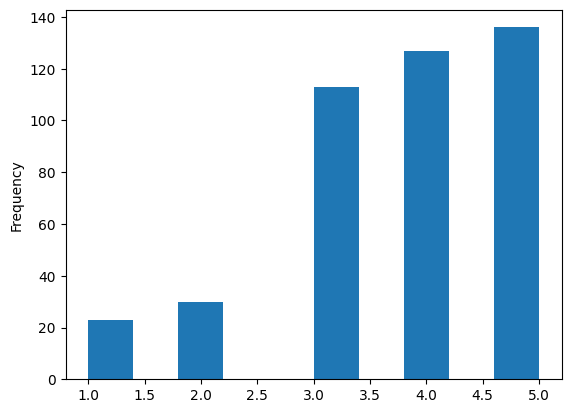

In [45]:
# df.set_index('Ifeltiwashelpingtotakecareofnature', inplace=True)
df['Ifeltiwashelpingtotakecareofnature'].plot(kind='hist')

<Axes: >

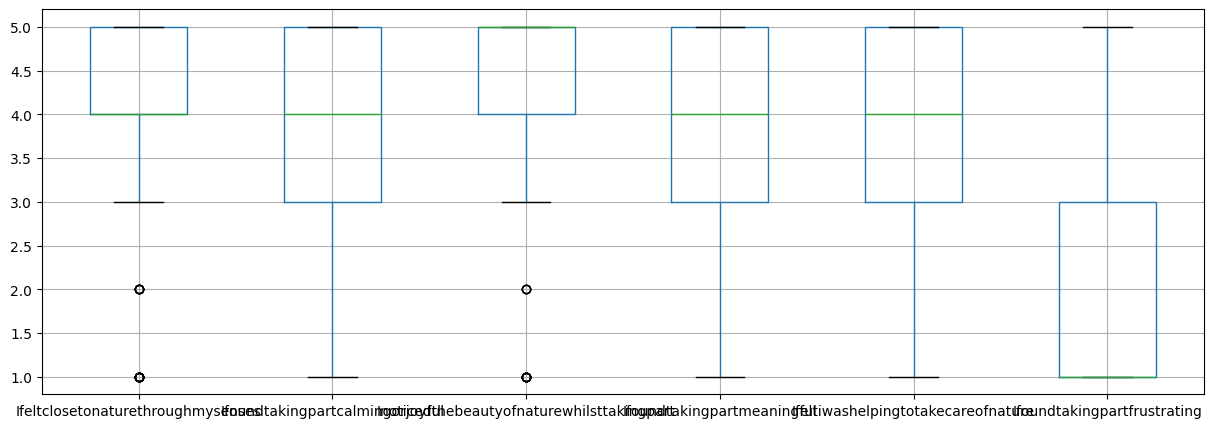

In [53]:
df.boxplot(column=['Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating'], figsize= (15,5))